# **Supervised Learning: Logistic Regression and Random Forest**

## Dataset Overview
Before applying any machine learning algorithms, it's essential to understand the data.The describe() method provides summary statistics of numerical features, helping understand their scale and spread.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns\

# Load the dataset
df = pd.read_csv('/mnt/creditcard.csv')

# Check for missing values and basic statistics
print("Dataset overview:")
print(df.info())
print(df.describe())

# Check the class distribution
print("Class distribution:")
print(df['Class'].value_counts())


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float

## Step 2: Splitting the Data
The dataset is split into input features (X) and the target variable (y). Then, the data is divided into training and testing sets using an 80-20 split.

In [7]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Step 3: Feature Scaling
Standardization is applied to the features.

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Step 4: Logistic Regression
Training and Evaluation - Logistic Regression is a linear model used for binary classification. It calculates the probability of a class label based on a linear combination of the input features. The predicted probabilities and class labels are derived here.

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]


## Performance Metrics
The classification report provides metrics like precision, recall, and F1-score, while ROC-AUC evaluates the model's performance across different thresholds.

In [10]:
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



## Visualizing ROC Curve
The ROC curve will illustrate the trade-off between sensitivity and specificity for the Logistic Regression model.

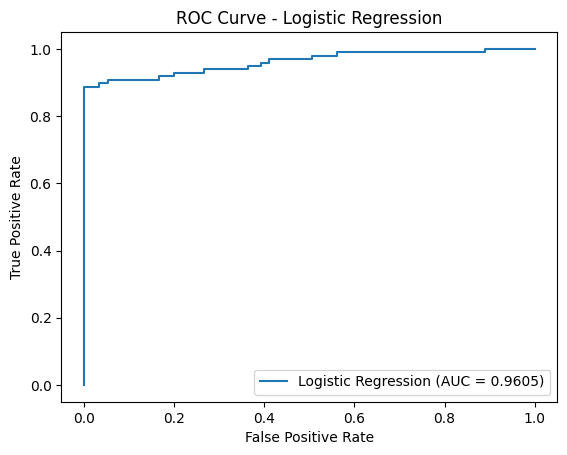

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


## Step 5: Random Forest Classifier
Training and Evaluation

In [12]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]


## Performance Metrics
The classification report and ROC-AUC score for the Random Forest model will be used to assess its performance.

In [13]:
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## Visualizing ROC Curve

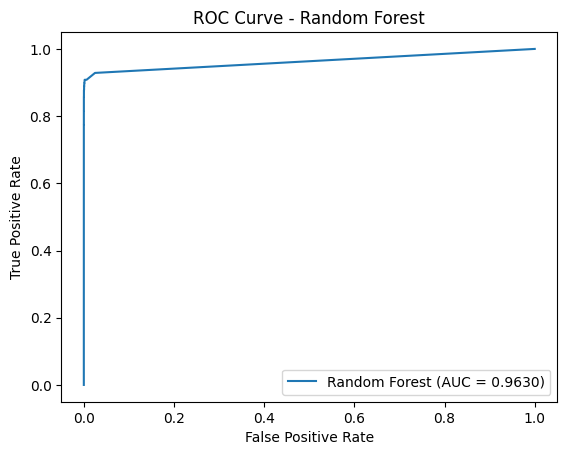

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


## Step 6: Confusion Matrix Comparison

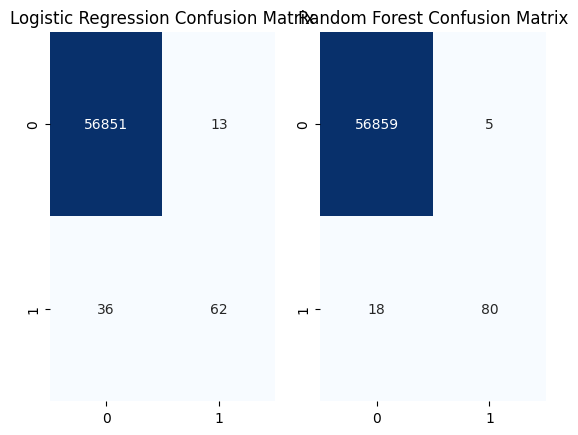

In [15]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12, 5))

# Confusion Matrix for Logistic Regression
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


# Unsupervised Learning: Clustering
## Step 1: Data Preparation for Clustering
In clustering, it's important to preprocess the features properly, particularly for distance-based algorithms.The dataset is loaded, and the target column (Class) is dropped, as labels are not used in unsupervised learning.

In [20]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv('/mnt/creditcard.csv')

# Drop the 'Class' column, since we are not using labels for unsupervised learning
X = df.drop(columns=['Class'])

# Scale the features for clustering (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## Step 2: Dimensionality Reduction using PCA
Principal Component Analysis (PCA) is applied to reduce the feature space to two dimensions.

In [21]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


## Clustering Algorithms
### 1. K-Means Clustering

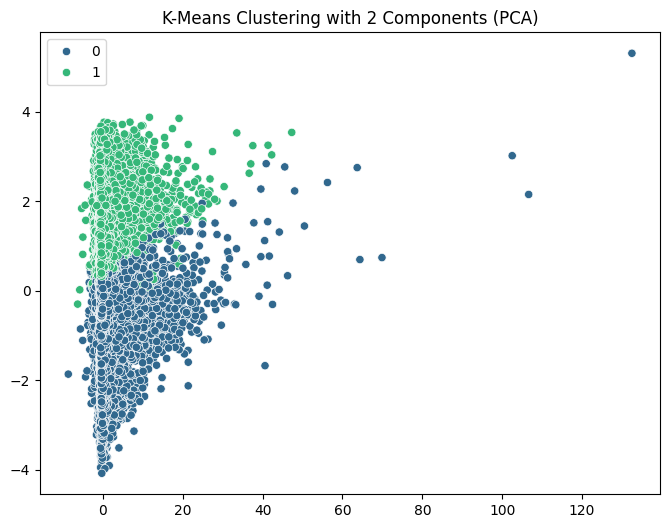

K-Means Clustering Results:
KMeans Cluster       0       1
Actual Class                  
0               155038  129277
1                  299     193


In [22]:
# Apply K-Means with 2 clusters (since we know we have two classes: fraud and non-fraud)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add the K-Means cluster labels to the dataframe
df['KMeans_Cluster'] = kmeans_labels

# Visualize the K-Means clustering using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering with 2 Components (PCA)')
plt.show()

# Check how the clusters correspond to actual fraud/non-fraud labels
print("K-Means Clustering Results:")
print(pd.crosstab(df['Class'], df['KMeans_Cluster'], rownames=['Actual Class'], colnames=['KMeans Cluster']))


### 2. DBSCAN Clustering

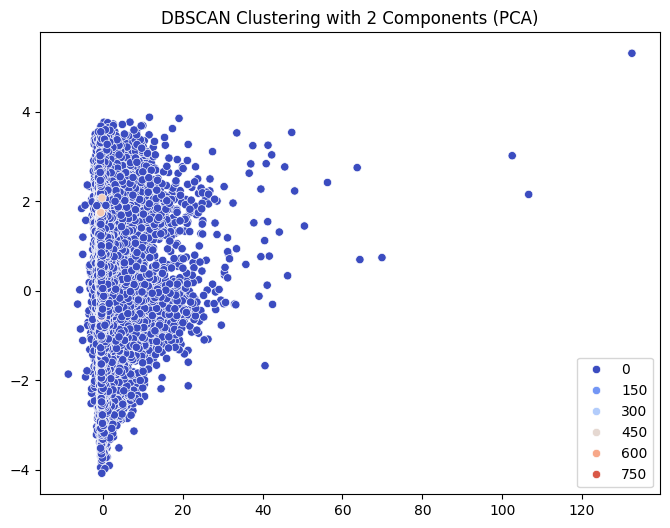

DBSCAN Clustering Results:
DBSCAN Cluster    -1     0     1     2     3     4     5     6     7     8    \
Actual Class                                                                   
0               238224    10    16    18    36   388    10   146    32    33   
1                  491     0     0     0     0     0     0     0     0     0   

DBSCAN Cluster  ...   834   835   836   837   838   839   840   841   842  \
Actual Class    ...                                                         
0               ...    10    12    27    73    10    22    13    36    10   
1               ...     0     0     0     0     0     0     0     0     0   

DBSCAN Cluster   843  
Actual Class          
0                 11  
1                  0  

[2 rows x 845 columns]


In [23]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize the DBSCAN clustering using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='coolwarm')
plt.title('DBSCAN Clustering with 2 Components (PCA)')
plt.show()

# Check how the DBSCAN clusters correspond to actual fraud/non-fraud labels
print("DBSCAN Clustering Results:")
print(pd.crosstab(df['Class'], df['DBSCAN_Cluster'], rownames=['Actual Class'], colnames=['DBSCAN Cluster']))


# Reinforcement Learning - Q-Learning Algorithm
Feature scaling is important because Q-Learning (or any algorithm) can be sensitive to feature magnitudes, and scaling ensures that all features contribute equally to the learning process.

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/mnt/creditcard.csv')

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Dimensionality Reduction Using PCA

In [25]:
# Reduce dimensionality using PCA for faster learning in RL
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_pca = pca.fit_transform(X_scaled)


## Splitting the Dataset

The dataset is split into training and testing sets (80% training, 20% testing). This ensures that the Q-Learning model is trained on one portion of the data and evaluated on unseen data to test its generalization ability.

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


## Q-Learning Algorithm Setup


In [27]:
# Q-Learning Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration factor
num_episodes = 1000  # Number of episodes
num_actions = 2  # Two possible actions: classify as fraud (1) or non-fraud (0)

# Initialize Q-Table (5 dimensions reduced from PCA, and 2 actions)
Q = np.zeros((len(X_train), num_actions))



## Defining the Reward Function

In [28]:
# Reward function: +1 for correct classification, -1 for incorrect classification
def reward_function(predicted_action, actual_label):
    if predicted_action == actual_label:
        return 1
    else:
        return -1


## Training the Q-Learning Agent




In [29]:
# Choose an action using epsilon-greedy policy
def choose_action(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Train the Q-Learning agent
for episode in range(num_episodes):
    # Randomly shuffle the training data
    indices = np.random.permutation(len(X_train))

    for idx in indices:
        state = idx
        action = choose_action(state, Q, epsilon)

        # Predict the label based on the chosen action (0 = non-fraud, 1 = fraud)
        predicted_action = action

        # Get the actual label
        actual_label = y_train.values[state]

        # Get the reward
        reward = reward_function(predicted_action, actual_label)

        # Q-Learning update rule
        next_state = (state + 1) % len(X_train)  # Move to the next transaction (loop over the dataset)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])


## Evaluating the Q-Learning Agent

In [30]:
# Testing the agent
correct_predictions = 0
for i, x_test in enumerate(X_test):
    state = i
    action = np.argmax(Q[state])  # Use the learned policy to make predictions

    # Compare with actual test labels
    predicted_action = action
    actual_label = y_test.values[state]

    if predicted_action == actual_label:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / len(X_test)
print(f"Q-Learning Model Accuracy on Test Data: {accuracy * 100:.2f}%")


Q-Learning Model Accuracy on Test Data: 99.66%
